![Github_top](https://user-images.githubusercontent.com/33735397/206313977-e67ba652-3340-4a1b-b1d1-141d8d5001f2.PNG)


# Community Streamflow Evaluation System (CSES)

National-scale streamflow modeling remains a modern challenge, as changes in the underlying hydrology from land use and land cover (LULC) change, anthropogentic streamflow modification, and general process components (reach length, hydrogeophysical processes, precipitation, temperature, etc) greatly influence  hydrological modeling.
In a changing climate, there is a need to anticipate flood intensity, impacts of groundwater depletion on streamflow, western montain low-flow events, eastern rain-on-snow events, storm-induced flooding, and other severe environmental problems that challenge the management of water resources.
Given the National Water Model (NWM) bridges the gap between the spatially coarse USGS streamflow observations by providing a near-continuous 2.7 million reach predictions of streamflow, there lies the potential to improve upon the capabilities of the model by characterizing predictive performance across the heterogeneity of proces ses and land covers present at the national scale. 
The python-based Community Streamflow Evaluation System (CSES) package provides a tool to evaluate national hydrogrphy dataset (NHD) based model outputs with colocated USGS/NWIS streamflow monitorng stations (parameter: 060). 
The package contains three key methods for evaluation: State-based LULC analysis, HUC level analysis, and USGS station-based reach analysis.
Below is a description of each method and application.
While designed to us the NWM version 2.1 retrospective dataset, with minimal modification the tool should be able to take in other model formulations.
By using the CSES, researchers can identify locations where a model may benefit from further training/calibration/parameterization or a need for new model processes/features (e.g., integration of reservoir release operaitons) to ultimately create new post-processing methods and/or hydrological modeling formulations to improve streamflow prediction capabilities with respect to modeling needs (e.g., stormflow, supply, emergency management, flooding, etc).   


In [1]:
import ROSET_AWS
import os
import warnings
warnings.filterwarnings("ignore")
#set path directory
cwd = os.getcwd()

# Streamflow evaluation: HUC Class

This section of code allows the user to evaluate modeled streamflow with observed in situ NWIS monitoring sites 
for a watershed(s) of interest. The user can input multiple watersheds (e.g., Great Salt lake: ['1601', '1602']).
Enter a start date, end date, watersheds and model to compare (NWM v2.1 is set up).
NWM retrospective data spans from 1980 - 2020, USGS/NWIS data is location dependent

Use [The National Map Watershed Boundary Dataset (WBD)]() to identify the HUC size and unit code of interestto locate HUC of interest.

![HUC_Eval_top](https://user-images.githubusercontent.com/33735397/206322410-ea0e210c-c805-4599-ad6b-704c76ba42ce.PNG)


In [2]:
#Enter a starting date, model for evaluation, and the respectrive HUC id(s)

startDT ='2015-4-01'
endDT ='2015-10-31'
model = 'NWM_v2.1'
HUCids = ['1601', '1602'] #must be in brackets, add multiple HUCs to complete a watershed (e.g. GSL basin), East vs. West. etc
#0802 causing issues, is the state there?
#Initiate function
HUC_Eval = ROSET_AWS.HUC_Eval(model, HUCids, startDT, endDT, cwd)


In [3]:
#Match NWIS locations within HUC watershed
HUC_Eval.Join_WBD_StreamStats()

Getting geospatial information for HUC:  ['1601', '1602']
['1601', '1602']
Finding NWIS monitoring stations within  ['1601', '1602']  watershed boundary
Creating dataframe of NWIS stations within  ['1601', '1602']  watershed boundary


In [4]:
#Get NWM reaches for each NWIS monitoring station
HUC_Eval.get_NHD_Model_info()

#Get NWM and NWIS data to compare
HUC_Eval.prepare_comparison() # run the apply function to not have to run it during evaluation

Getting collocated  NWM_v2.1  NHD reaches with NWIS monitoring locations


Getting  NWM_v2.1  data


100% |########################################################################|


Getting NWIS data


100% |########################################################################|


## Interactive plotting on map
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

In [5]:
#Run Map function
HUC_Eval.Map_Plot_Eval('M', supply = False)

Plotting monitoring station locations


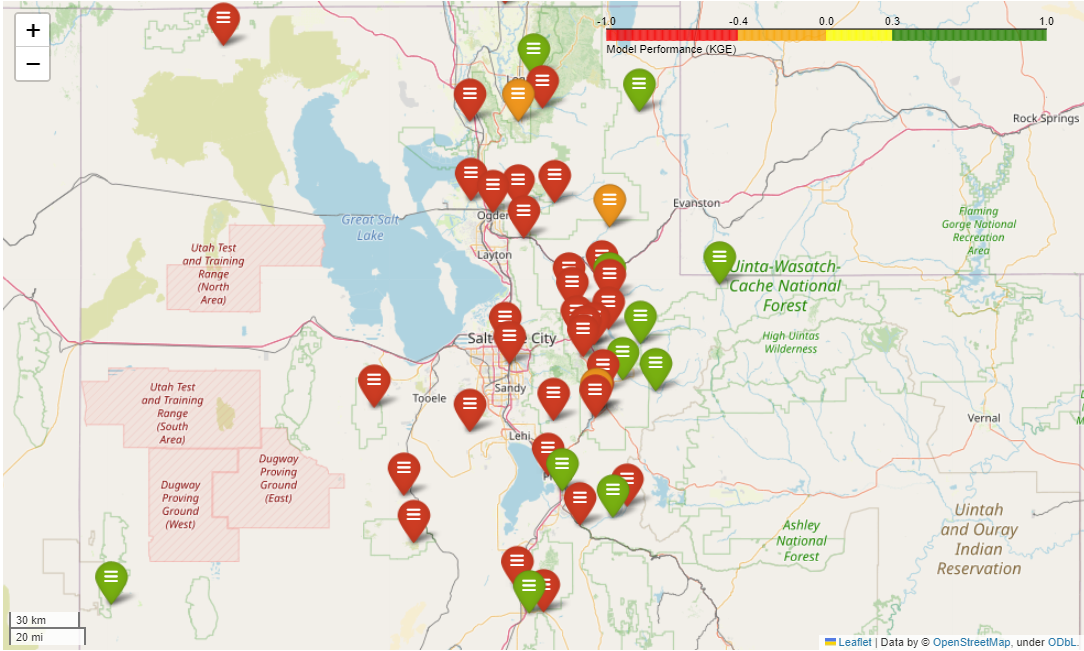

## Interactive time series plotting
Set frequency for graph:
* <span style="color:red">'D'</span>: Daily
* <span style="color:red">'M'</span>: monthly, 
* <span style="color:red">'Q'</span>: quarterly, 
* <span style="color:red">'A'</span>: annual

Set supply = <span style="color:green"> **True** </span> to evaluate cumulative water year totals or <span style = "color:green"> **False** </span> to look at desired temporal resolution

NWIS_site_id  NHD_reachid  \
0      10011500      7887898   
1      10149400     10349220   
2      10154200     10373692   
3      10155000     10373622   
4      10146000     10330245   
5      10153100     10348934   
6      10172870     10683178   
7      10131000     10093066   
8      10109000       664424   
9      10023000      7880800   
10     10128500     10093110   
11     10133600     10276878   
12     10150500     10349360   
13     10145400     10331031   
14     10137500     10274270   
15     10149000     10349162   
16     10132500     10089426   
17     10105900       666170   
18     10156000     10375650   
19     10155500     10375648   
20     10155200     10373794   
21     10140700     10274376   
22     10132000     10093052   
23     10172800     10395905   
24     10126000      4605050   
25     10168000     10389562   
26     10134500     10277268   
27     10133800     10276836   
28     10133650     10276856   
29     10140100     10275828   
30     10164500     10329013   
31     10133980     10276712   
32     10130500     10092262   
33     10136500     10274616   
34     10146400     10331001   
35     10129500     10093214   
36     10172952      1169706   
37     10113500       666156   
38     10129900     10093082   
39     10172700     10396937   
40     10163000     10376596   
41     10166430     10327201   
42     10092700      4560060   
43     10068500      4472049   
44     10141000     10273232   
45     10171000     10390290   
46     10039500      7898927   
47     10157500     10375690   
48     10172727     10396113   

                                             Location    RMSE  MaxError  \
0             BEAR RIVER NEAR UTAH-WYOMING STATE LINE    3549      5997   
1          DIAMOND FORK ABV RED HOLLOW NR THISTLE, UT     998      1753   
2                       PROVO RIVER NEAR WOODLAND, UT    5157      6974   
3                      PROVO RIVER NEAR HAILSTONE, UT    8080     13452   
4                             SALT CREEK AT NEPHI, UT     137       265   
5      HOBBLE CREEK AT 1650 WEST AT SPRINGVILLE, UTAH    1192      2299   
6                         TROUT CREEK NEAR CALLAO, UT     203       346   
7                        CHALK CREEK AT COALVILLE, UT    1687      2428   
8         LOGAN RIVER ABOVE STATE DAM, NEAR LOGAN, UT    6701     16050   
9                         BIG CREEK NEAR RANDOLPH, UT     132       185   
10                        WEBER RIVER NEAR OAKLEY, UT    7693     17354   
11                    MCLEOD CREEK NEAR PARK CITY, UT     380       512   
12                       SPANISH FORK AT CASTILLA, UT    8119     12891   
13      SALT CRK BL NEPHI POWERPLANT DIV NR NEPHI, UT     191       319   
14         SOUTH FORK OGDEN RIVER NEAR HUNTSVILLE, UT    2822      6321   
15     SIXTH WATER CRK AB SYAR TUN NR SPRINGVILLE, UT    1194      1837   
16                      LOST CREEK NEAR CROYDON, UTAH     876      1543   
17                  LITTLE BEAR RIVER AT PARADISE, UT    1911      2849   
18                    SNAKE CREEK NEAR CHARLESTON, UT    1223      1669   
19                    PROVO RIVER NEAR CHARLESTON, UT   19152     34737   
20     PROVO RIV AT RIV ROAD BRIDGE NR HEBER CITY, UT   20003     37239   
21          OGDEN RIVER NR GIBSON AVENUE AT OGDEN, UT    8412     10921   
22                            WEBER RIVER AT ECHO, UT   31693     60229   
23            SOUTH WILLOW CREEK NEAR GRANTSVILLE, UT     674      1318   
24                        BEAR RIVER NEAR CORINNE, UT  104843    142296   
25      LITTLE COTTONWOOD CREEK @ JORDAN RIVER NR SLC    6290     12883   
26                  EAST CANYON CREEK NEAR MORGAN, UT    7842     10299   
27            EAST CANYON CREEK NEAR JEREMY RANCH, UT    3405      4098   
28     E CANYON CR BL I-80 REST STOP NR PARK CITY, UT    2272      2688   
29      OGDEN RIVER BL PINEVIEW RES NR HUNTSVILLE, UT    9733     13014   
30  AMERICAN FK AB UPPER POWERPLANT NR AMERICAN FK...    8045     17301   
31

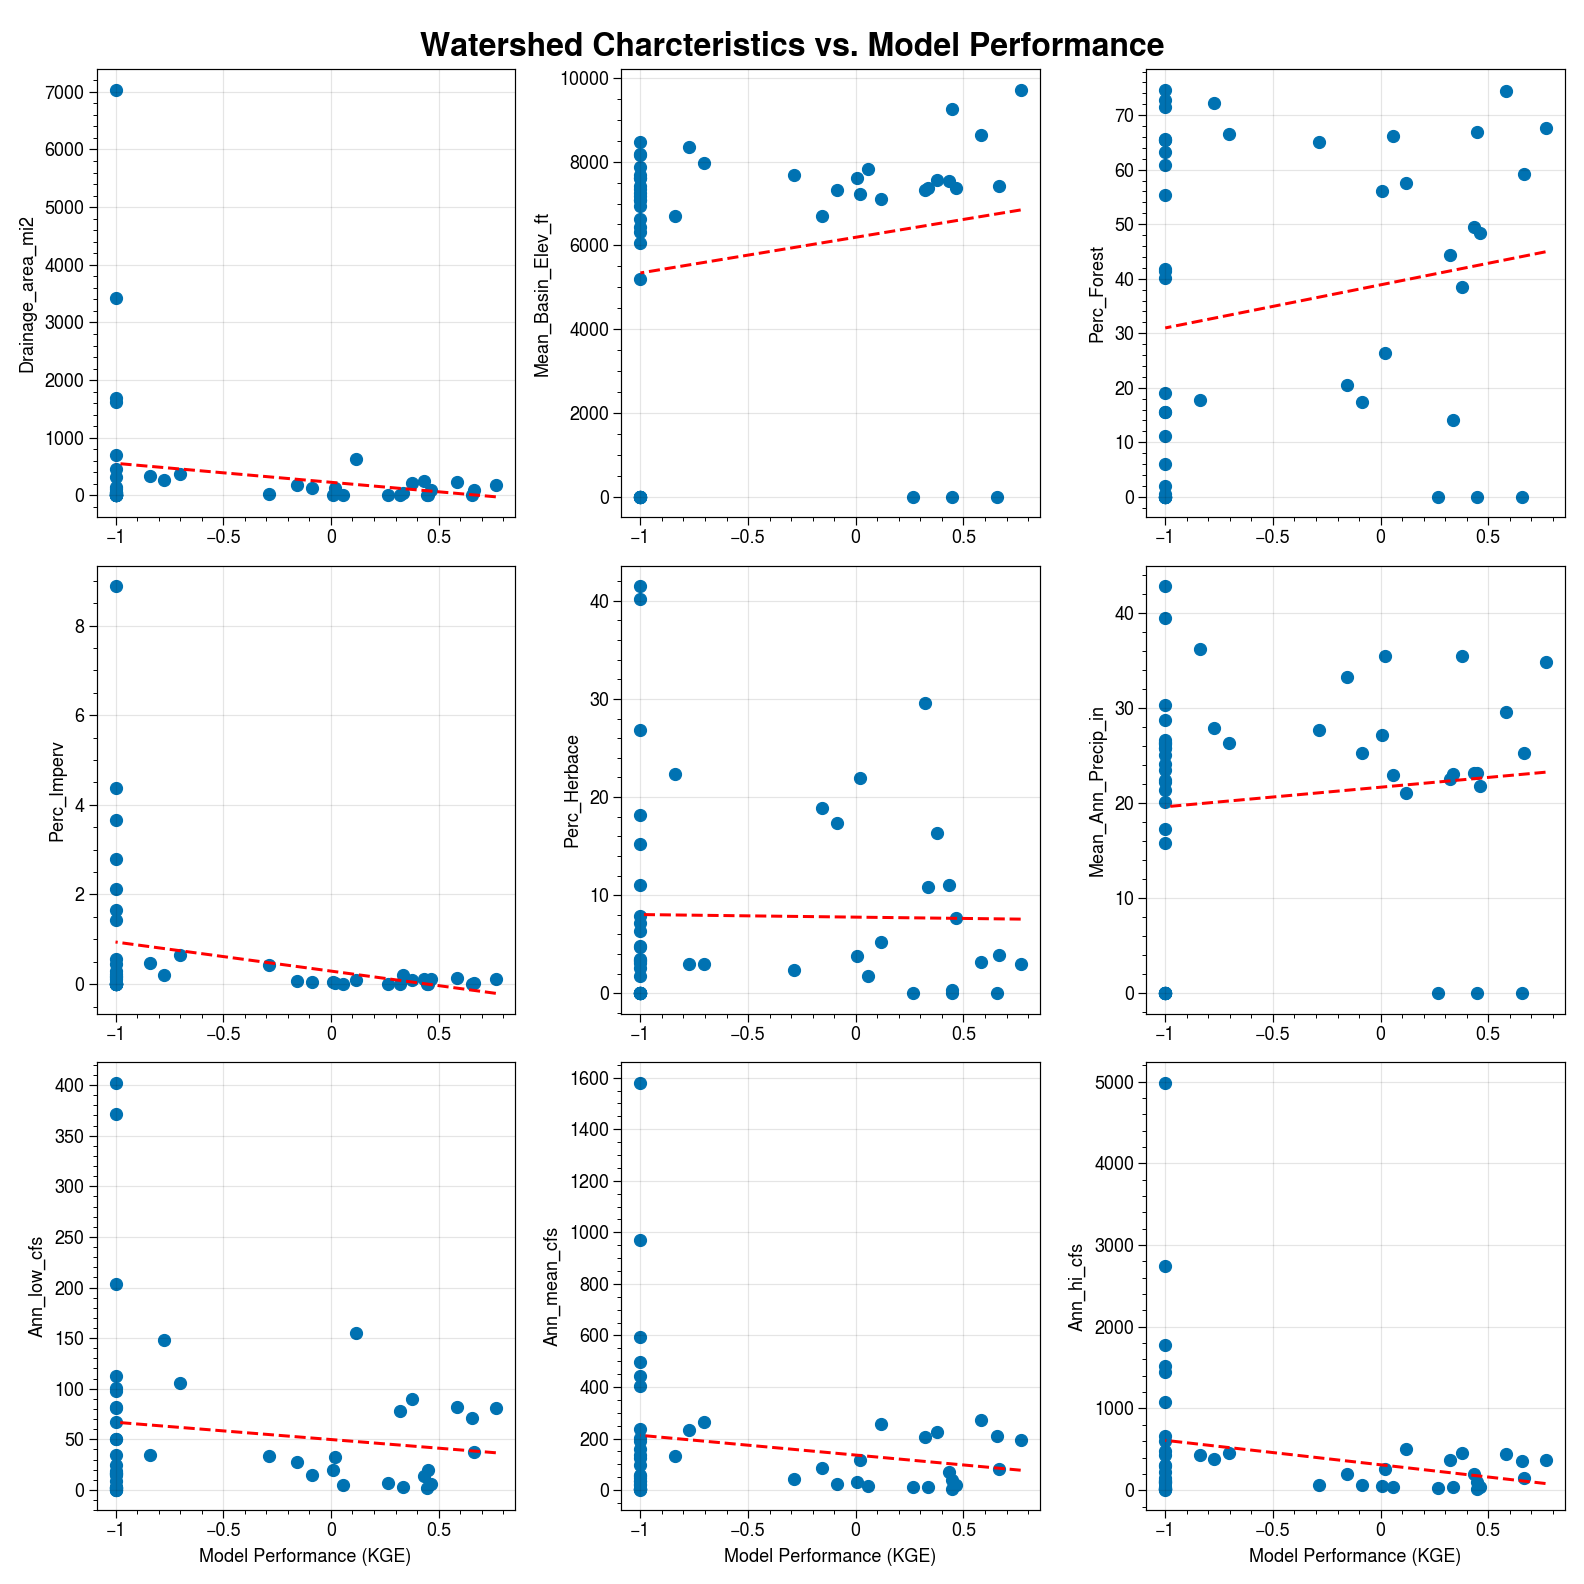

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10011500                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_7887898 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149400                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10349220 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10154200                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10373692 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10373622 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10146000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10330245 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10153100                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10348934 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172870                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10683178 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10131000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093066 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10109000                 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_664424 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                              :Rectangles   [x0,y0,x1,y1]
      .Text.I                                    :Text   [x,y]
      .Text.II                                   :Text   [x,y]
      .Text.III                                  :Text   [x,y]
      .Text.IV                                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10023000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_7880800 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10128500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093110 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133600                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276878 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10150500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10349360 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10145400                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10331031 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10137500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10274270 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10149000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10349162 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10132500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10089426 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10105900                 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_666170 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                              :Rectangles   [x0,y0,x1,y1]
      .Text.I                                    :Text   [x,y]
      .Text.II                                   :Text   [x,y]
      .Text.III                                  :Text   [x,y]
      .Text.IV                                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10156000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10375650 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10375648 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10155200                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10373794 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140700                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10274376 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10132000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093052 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172800                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10395905 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10126000                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4605050 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10168000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10389562 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10134500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10277268 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133800                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276836 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133650                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276856 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10140100                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10275828 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10164500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10329013 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10133980                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10276712 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10130500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10092262 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10136500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10274616 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10146400                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10331001 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10129500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093214 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172952                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_1169706 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10113500                 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_666156 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                              :Rectangles   [x0,y0,x1,y1]
      .Text.I                                    :Text   [x,y]
      .Text.II                                   :Text   [x,y]
      .Text.III                                  :Text   [x,y]
      .Text.IV                                   :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10129900                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10093082 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172700                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10396937 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10163000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10376596 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10166430                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10327201 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10092700                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4560060 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10068500                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_4472049 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10141000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10273232 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10171000                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10390290 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10039500                  :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_7898927 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                               :Rectangles   [x0,y0,x1,y1]
      .Text.I                                     :Text   [x,y]
      .Text.II                                    :Text   [x,y]
      .Text.III                                   :Text   [x,y]
      .Text.IV                                    :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10157500                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10375690 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

:Layout
   .Overlay.I  :Overlay
      .Curve.USGS_colon_10172727                   :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Curve.NWM_v2_full_stop_1_colon_NHD_10396113 :Curve   [DateTime]   (Discharge (Acre-Feet))
      .Rectangles.I                                :Rectangles   [x0,y0,x1,y1]
      .Text.I                                      :Text   [x,y]
      .Text.II                                     :Text   [x,y]
      .Text.III                                    :Text   [x,y]
      .Text.IV                                     :Text   [x,y]
   .Overlay.II :Overlay
      .Scatter.I :Scatter   [ Observed Discharge (Acre-Feet)]   (NWM_v2.1 Discharge (Acre-Feet))
      .Curve.I   :Curve   [x]   (y)

In [6]:
#Plot evaluation
HUC_Eval.Interactive_Model_Eval('M', supply = False)

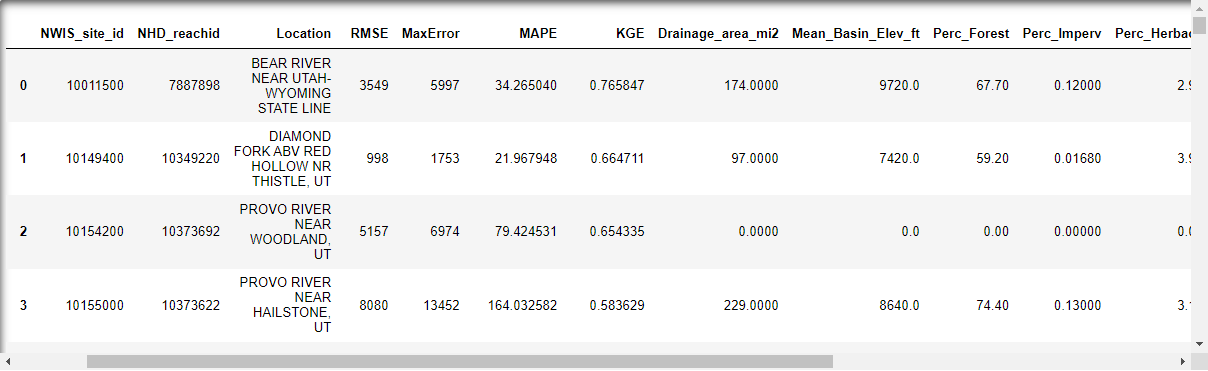

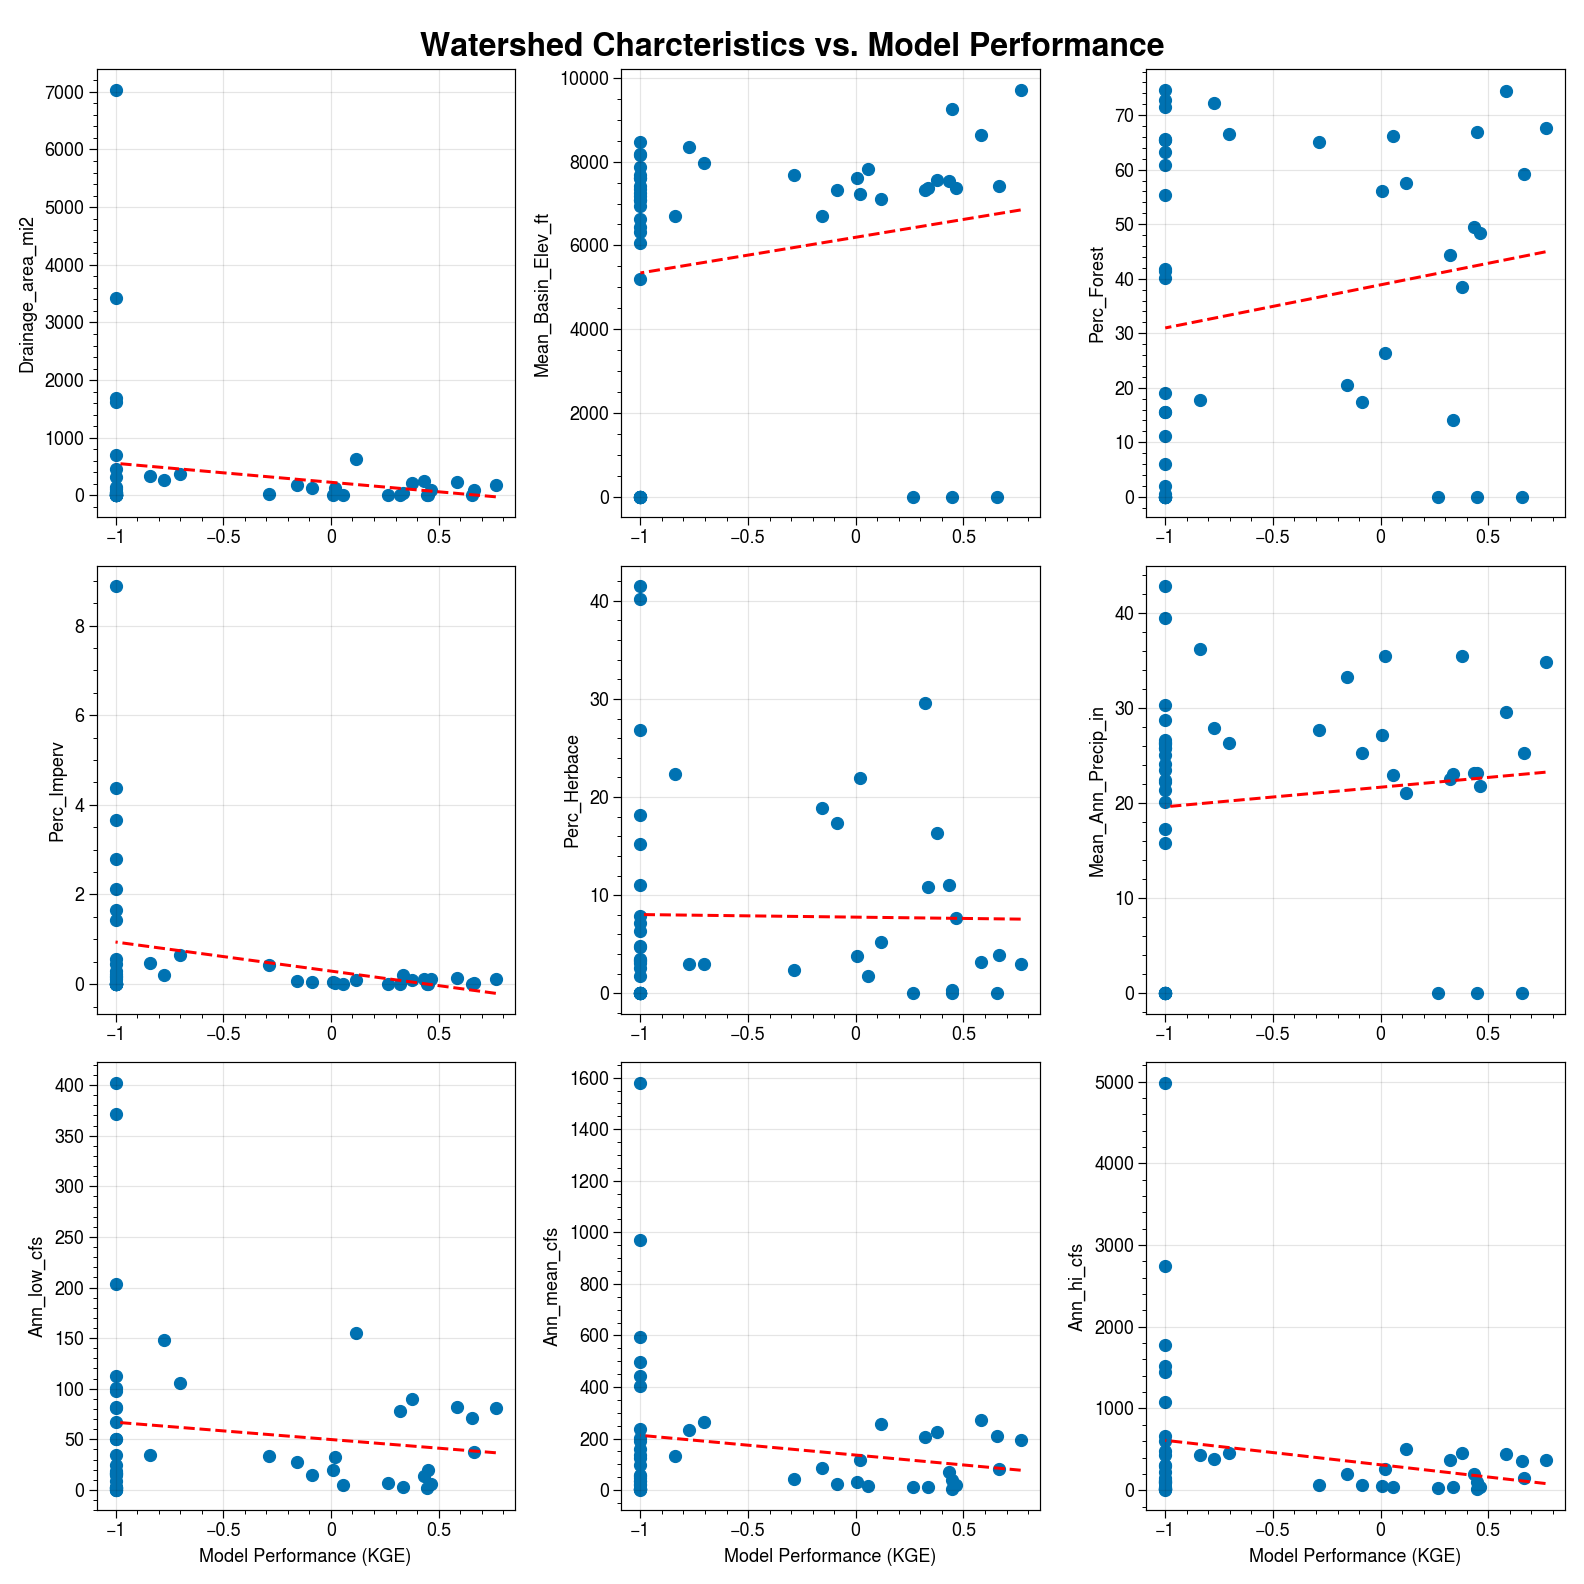

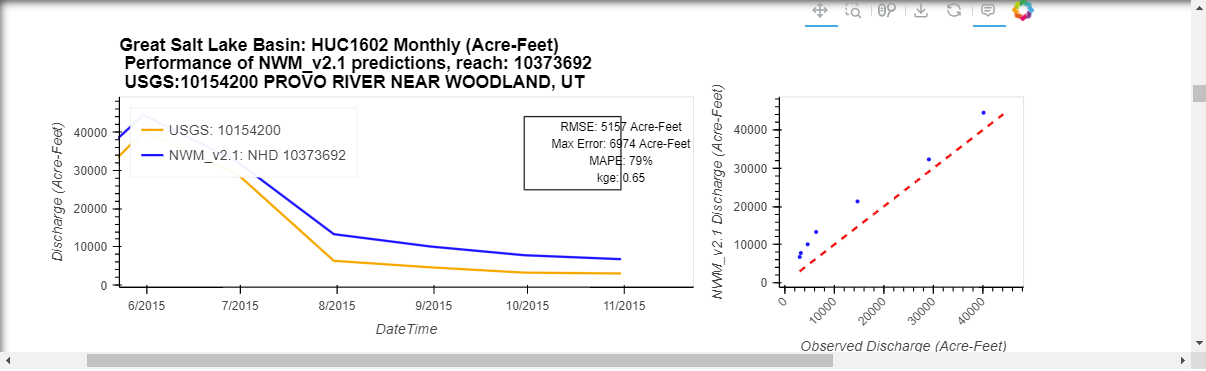